In [9]:
import pandas as pd

In [65]:
field_of_study = pd.read_csv('Most-Recent-Cohorts-Field-of-Study.csv')

In [66]:
field_of_study

,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,IPEDSCOUNT1,...,BBRR4_FED_COMP_N,BBRR4_FED_COMP_DFLT,BBRR4_FED_COMP_DLNQ,BBRR4_FED_COMP_FBR,BBRR4_FED_COMP_DFR,BBRR4_FED_COMP_NOPROG,BBRR4_FED_COMP_MAKEPROG,BBRR4_FED_COMP_PAIDINFULL,BBRR4_FED_COMP_DISCHARGE,DISTANCE
0,100654.0,1002,Alabama A & M University,Public,1,100,"Agriculture, General.",3,Bachelor's Degree,NaN,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,0
1,100654.0,1002,Alabama A & M University,Public,1,101,Agricultural Business and Management.,3,Bachelor's Degree,NaN,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,0
2,100654.0,1002,Alabama A & M University,Public,1,109,Animal Sciences.,3,Bachelor's Degree,6.0,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,1
3,100654.0,1002,Alabama A & M University,Public,1,110,Food Science and Technology.,3,Bachelor's Degree,7.0,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,1
4,100654.0,1002,Alabama A & M University,Public,1,110,Food Science and Technology.,5,Master's Degree,8.0,...,12,PS,PS,PS,PS,PS,PS,PS,PS,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233974,NaN,42640,California Southern University,"Private, for-profit",1,4228,"Clinical, Counseling and Applied Psychology.",7,First Professional Degree,NaN,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,0
233975,NaN,42640,California Southern University,"Private, for-profit",1,5138,"Registered Nursing, Nursing Administration, Nu...",3,Bachelor's Degree,NaN,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,0
233976,NaN,42924,Body Wisdom Massage Therapy School,"Private, for-profit",1,5135,Somatic Bodywork and Related Therapeutic Servi...,1,Undergraduate Certificate or Diploma,NaN,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,0
233977,NaN,42961,Madera Community College,Public,1,2401,"Liberal Arts and Sciences, General Studies and...",2,Associate's Degree,NaN,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,0


In [5]:
field_of_study['EARN_PELL_WNE_MDN_4YR']

0         PS
1         PS
2         PS
3         PS
4         PS
          ..
233974    PS
233975    PS
233976    PS
233977    PS
233978    PS
Name: EARN_PELL_WNE_MDN_4YR, Length: 233979, dtype: object

In [7]:
field_of_study['EARN_COUNT_NOPELL_WNE_4YR']

0         PS
1         PS
2         PS
3         PS
4         PS
          ..
233974    PS
233975    PS
233976    PS
233977    PS
233978    PS
Name: EARN_COUNT_NOPELL_WNE_4YR, Length: 233979, dtype: object

In [18]:
field_of_study['EARN_COUNT_PELL_WNE_4YR']

0         PS
1         PS
2         PS
3         PS
4         PS
          ..
233974    PS
233975    PS
233976    PS
233977    PS
233978    PS
Name: EARN_COUNT_PELL_WNE_4YR, Length: 233979, dtype: object

In [6]:
field_of_study['EARN_NOPELL_WNE_MDN_4YR']

0         PS
1         PS
2         PS
3         PS
4         PS
          ..
233974    PS
233975    PS
233976    PS
233977    PS
233978    PS
Name: EARN_NOPELL_WNE_MDN_4YR, Length: 233979, dtype: object

In [3]:
field_of_study['CIPCODE']

0          100
1          101
2          109
3          110
4          110
          ... 
233974    4228
233975    5138
233976    5135
233977    2401
233978    5138
Name: CIPCODE, Length: 233979, dtype: int64

In [87]:
cs_condition = field_of_study['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11'))

pell_cs = field_of_study[cs_condition][['EARN_COUNT_PELL_WNE_4YR']]
no_pell_cs = field_of_study[cs_condition][['EARN_COUNT_WNE_4YR']]
pell_non_cs = field_of_study[~cs_condition][['EARN_COUNT_PELL_WNE_4YR']]
no_pell_non_cs = field_of_study[~cs_condition][['EARN_COUNT_WNE_4YR']]

In [88]:
pell_cs['CS'] = True
pell_cs['Pell'] = True
pell_cs.rename(columns={'EARN_COUNT_PELL_WNE_4YR': 'Count'}, inplace=True)

no_pell_cs['CS'] = True
no_pell_cs['Pell'] = False
no_pell_cs.rename(columns={'EARN_COUNT_WNE_4YR': 'Count'}, inplace=True)

pell_non_cs['CS'] = False
pell_non_cs['Pell'] = True
pell_non_cs.rename(columns={'EARN_COUNT_PELL_WNE_4YR': 'Count'}, inplace=True)

no_pell_non_cs['CS'] = False
no_pell_non_cs['Pell'] = False
no_pell_non_cs.rename(columns={'EARN_COUNT_WNE_4YR': 'Count'}, inplace=True)

all_pell_data = pd.concat([pell_cs, no_pell_cs, pell_non_cs, no_pell_non_cs])
all_pell_data

,Count,CS,Pell
16,26,True,True
17,PS,True,True
68,28,True,True
69,PS,True,True
70,PS,True,True
...,...,...,...
233974,PS,False,False
233975,PS,False,False
233976,PS,False,False
233977,PS,False,False


In [89]:
all_pell_data = all_pell_data[all_pell_data['Count'] != "PS"]
all_pell_data['Count'] = all_pell_data['Count'].fillna(0).astype(int)


/var/folders/_g/bhxqyzfn3tl8bx13c4flvydr0000gn/T/ipykernel_36572/967655874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_pell_data['Count'] = all_pell_data['Count'].fillna(0).astype(int)


In [85]:
all_pell_data[all_pell_data['Count'] == 0]


,Count,CS,Pell


[Text(0.5, 1.0, 'Popularity of CS vs Non-CS for Pell & Non-Pell Graduates')]

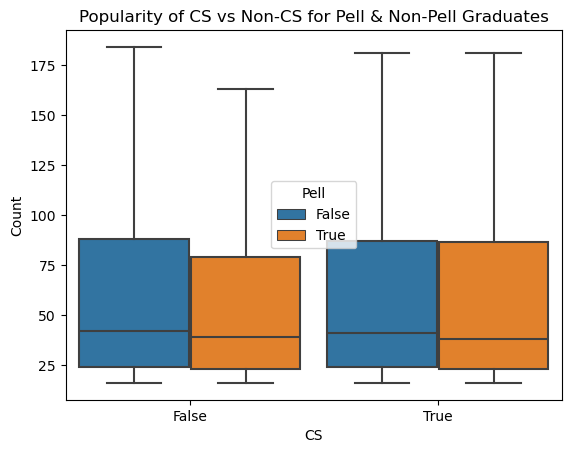

In [90]:
import seaborn as sns
from matplotlib import pyplot as plt
ax = sns.boxplot(data = all_pell_data, x = 'CS', y ='Count', hue="Pell", width=0.9, showfliers=False);
ax.set(title = 'Popularity of CS vs Non-CS for Pell & Non-Pell Graduates')